# Homework 2: Visual Data Science

### 1. Linear Regression

Assume we are given $n$ examples $(\vec{x}_{1}, y_{1}),\;(\vec{x}_{2}, y_{2}),\;\dots,\;(\vec{x}_{n}, y_{n})$, where each data point $\vec{x}_{i}$ has $m$ real-valued features (i.e., $\vec{x}_{i}$ is $m$-dimensional). The goal of regression is to learn to predict $y$ from $\vec{x}$, where each $y_i$ is also real-valued (i.e. continuous).

The linear regression model assumes that the output $Y$ is a linear combination of input features $X$ plus noise terms $\epsilon$ from a given distribution, with weights on the input features given by $\beta$.

We can write this in matrix form by stacking the data points $\vec{x}_{i}$ as rows of a matrix $X$, such that $x_{ij}$ is the $j$-th feature of the $i$-th data point. We can also write $Y$ , $\beta$, and $\epsilon$ as column vectors, so that the matrix form of the linear regression model is: $$ Y = X\beta + \epsilon $$ where
$$
Y = 
\begin{bmatrix}
y_{1} \\ 
\vdots \\ 
y_{n}
\end{bmatrix}
,\quad
\epsilon = 
\begin{bmatrix}
\epsilon_{1} \\ 
\vdots \\ 
\epsilon_{n}
\end{bmatrix}
,\quad
\beta = 
\begin{bmatrix}
\beta_{1} \\ 
\vdots \\ 
\beta_{m}
\end{bmatrix}
,\quad
X = 
\begin{bmatrix}
\vec{x}_{1} \\ 
\vdots \\ 
\vec{x}_{n}
\end{bmatrix},
$$
and where $\vec{x}_{i} = [x_1, x_2, \ldots, x_n]$.

Linear regression seeks to find the parameter vector $\beta$ that provides the best fit of the above regression model. There are lots of ways to measure the goodness of fit; one criteria is to find the $\beta$ that minimizes the squared-error loss function: $$ J(\beta) = \sum_{i=1}^{n}\bigl(y_{i} - \vec{x}_{i}^{T}\,\beta\bigr)^{2}, $$ or more simply in matrix form: $$ J(\beta) = (X\beta - Y)^{T}(X\beta - Y), $$ which can be solved directly under certain circumstances: $$ \hat\beta = (X^{T}X)^{-1}X^{T}Y $$ (recall that the "hat" notation $\hat\beta$ is used to denote an *estimate* of a true but unknown-and possibly, unknow*able*-value


When we throw in the $\epsilon$ error term, assuming it is drawn from independent and identically distributed (“i.i.d.”) Gaussians (i.e., $\epsilon_i \sim \mathcal{N}\bigl(0,\,\sigma^2\bigr)$), then the above solution is also the MLE estimate for $P\bigl(Y \mid X; \beta\bigr)$.

All told, then, we can make predictions $\hat Y$ using $\hat\beta$ ($X$ could be the training set, or new data altogether): $$\hat{Y} = X\hat{\beta} + \epsilon$$

Now, when we perform least squares regression, we make certain idealized assumptions about the vector of error terms $\epsilon$, namely that each $\epsilon_i$ is i.i.d. according to $\mathcal{N}\bigl(0,\,\sigma^2\bigr)$ for some value of $\sigma$. In practice, these idealized assumptions often don’t hold, and when they fail, they can outright implode. An easy example and inherent drawback of Gaussians is that they are sensitive to outliers; as a result, noise with a “heavy tail” (more weight at the ends of the distribution than your usual Gaussian) will pull your regression weights toward it and away from its optimal solution.

In cases where the noise term $\epsilon_i$ can be arbitrarily large, you have a situation where your linear regression needs to be *robust* to outliers. Robust methods start by weighting each observation *unequally*: specifically, observations that produce large residuals are downweighted.

##### a. In this problem, you will assume $\epsilon_1, \ldots, \epsilon_n$ are i.i.d. drawn from a Laplace distribution (rather than $\mathcal{N}\bigl(0,\,\sigma^2\bigr)$); that is, each $\epsilon_i \sim \mathrm{Lap}(0, b)$, where $\mathrm{Lap}(0, b) \;=\;\frac{1}{2b}\,\exp\!\Bigl(-\tfrac{|\epsilon_i|}{b}\Bigr)$.<br><br> Derive the loss function $J_{\mathrm{Lap}}(\beta)$ whose minimization is equivalent to finding the MLE of $\beta$ under the above noise model. <br>

*Hint 1*: Recall the critical point above about the form of the MLE; start by writing out $P(Y_i | X_i ; \beta)$

*Hint 2*: Logarithms nuke pesky terms with exponents without changing linear relationships.

*Hint 3*: Multiplying an equation by -1 will switch from “argmin” to “argmax” and vice versa.

---

Given the linear regression model $Y_i = X_{i}^{T}\beta + \epsilon_i$ ($X$ is a column), then $\epsilon_i = Y_i - X_{i}^T\beta$. Since we assume $\epsilon_i$ is i.i.d. drawn from a Laplace distribution, substituting it into $\mathrm{Lap}(0, b)$ gives the conditional density of $Y_i$ given $X_i$ and $\beta$: $$P(Y_i | X_i ; \beta) = \mathrm{Lap}(0, b) \;=\;\frac{1}{2b}\,\exp\!\Bigl(-\tfrac{|Y_i - X_{i}^T\beta|}{b}\Bigr)$$

To form the likelihood $\mathcal{L}(\beta)$ over the whole data set, simply take the product of all individual probability densities: 
$$ \mathcal{L}(\beta) = \prod_{i=1}^{n}\frac{1}{2b}\exp\!\Bigl(-\frac{\lvert Y_{i} - \mathbf{X}_{i}^{T}\beta\rvert}{b}\Bigr) = \biggl(\frac{1}{2b}e^{-\frac{\lvert Y_{1}-X_{1}^{T}\beta\rvert}{b}}\biggr)\;\times\;\biggl(\frac{1}{2b}e^{-\frac{\lvert Y_{2}-X_{2}^{T}\beta\rvert}{b}}\biggr)\;\times\;\dots\;\times\;\biggl(\frac{1}{2b}e^{-\frac{\lvert Y_{n}-X_{n}^{T}\beta\rvert}{b}}\biggr) $$

Next, take the log to get the log-likelihood $\mathcal{l}(\beta) = \log{\mathcal{L}(\beta)}$:
$$ \mathcal{l}(\beta) = \sum_{i=1}^{n}[\log{\frac{1}{2b}} + \log{(\exp\!\Bigl(-\frac{\lvert Y_{i} - \mathbf{X}_{i}^{T}\beta\rvert}{b}\Bigr))}] = \sum_{i=1}^{n}\Bigl[-\log(2b)\;-\;\frac{1}{b}\,\bigl|\,Y_{i}-X_{i}^{T}\beta\bigr|\Bigr] $$

We only care about the $ |Y_{i} - {X}_{i}^{T}\beta| $ term since it is the only part dependent on $\beta$. Simplifying and dropping constant terms gives $J_{\mathrm{Lap}}(\beta)$:
$$J_{\mathrm{Lap}}(\beta) = \sum_{i=1}^n\bigl|Y_i - X_i^T\beta\bigr|$$

---

##### b. Why do you think the above model provides a more robust fit to data compared to the standard model assuming the noise terms are distributed as Gaussians? Be specific!

---

By replacing the squared‑error penalty with an absolute‑error penalty, the Laplace‑noise model caps each observation’s leverage on the parameter estimates, so a handful of extreme (or mis‑recorded) points cannot hijack the regression line—thereby yielding a more robust fit than the standard Gaussian‑noise model.

---

### 2. Linear Dynamical Systems

Linear dynamical systems (LDS) are multidimensional time series models with two components: an appearance component, and state component, that are used to model and identify dynamic textures. Dynamic textures are video sequences that display spatial regularities over time, regularities we want to capture while simultaneously retaining their temporal coherence. The appearance component is a straightforward application of dimensionality reduction, projecting the original temporal state into a low-dimensional “state space”: $$\vec{y}_{t} \;=\; C\,\vec{x}_{t} \;+\; \vec{u}_{t}$$ where $\vec{y}_{t}$ is the current frame, $\vec{y}_{t}$ is the corresponding "state," $\vec{y}_{t}$ is white noise, and $C$ is the matrix that maps the appearance space to the state space (and vice versa), sometimes referred to as the *output matrix*: it defines the appearance of the model.

The state component is nothing more than an autoregressive model, a linear combination of Markov assumptions that model the movement of the system in the low-dimensional state space: $$ \vec{x}_{t} = A\,\vec{x}_{t-1} \;+\; W\,\vec{v}_{t} $$ where $\vec{x}_{t}$ and $\vec{x}_{t-1}$ are the positions of the model in the state space at times $t$ and $t-1$ respectively, $W\,\vec{v}_{t}$ is the *driving noise* at time $t$, and $A$ is the transition between states that defines how the model moves.

##### a. In the following questions, we’re going to use only the state component of the LDS (i.e., we’ll only use the second equation to model motion). How could we formalize “ignoring” the appearance component? What values could we use in the appearance component so that the original data $\vec{y_t}$ is also our state space data $\vec{x_t}$?

---

To "ignore" the appearance component, we must choose values for $C$ and $\vec{u}_t$ such that $\vec{y}_t = \vec{x}_t$. These values would be $C = I$, where $I$ is the identity matrix, and $\vec{u}_t = 0$.

---

##### b. To simplify, let’s ignore the appearance component and focus on a toy example in two dimensions. Suppose each $\vec{x}_t$ is an $(x, y)$ pair from the plot. Set up the equations to solve for $A$ (Note: your solution should generalize to $n$ 2D points. Also, you can assume there is no noise term (i.e. $ W{\vec{v}_t}=0 $)).

<img src="./2D.png" alt="example toy sequence of 2D points" style="display: block; margin: 0 auto; width: 50%; max-width: 400px;"><br>

*Hint*: If there is no noise term, then each $\vec{x_t}$ can be written as $A\vec{x}_{t-1}$ for all $t$. Write a few of these out, then organize them into systems of equations.

---

Writing a few out:
$$ \vec{x}_3 = A\vec{x}_2 $$
$$ \vec{x}_4 = A\vec{x}_3 $$
$$ \vec{x}_5 = A\vec{x}_4 $$
$$ \ldots $$
$$ \vec{x}_n = A\vec{x}_{n-1} $$

If the terms are collected into $X_{2}^{n} = [\vec{x}_2, \ldots, \vec{x}_n]$ and $X_{1}^{n-1} = [\vec{x}_1, \ldots, \vec{x}_{n-1}]$, where each matrix is of size $2 \times (n-1)$, the "stacked" equation becomes $$ X_{2}^{n} = AX_{1}^{n-1} $$

Finally, take the pseudo‑inverse of $X_{1}^{n-1}$ (since $X_{1}^{n-1}$ when $ (n - 1) \gt 2$) to isolate $A$.
$$ A = X_{2}^{n}(X_{1}^{n-1})^{\diamond} $$

---

An interesting property of any model is its behavior in the limit. Those familiar with certain dimensionality reduction strategies will notice the simplified autoregressive model from the previous step looks an awful lot like a power iteration for finding approximate eigenvalues and eigenvectors of a matrix: if $M$ is your matrix of interest, you can iteratively update a vector $\vec{v}$ such that $\vec{v}_{t+1} = M\vec{v}_t$, and each additional iteration will bring $\vec{v}$ closer to the true leading eigenvector of $M$.

Assuming $M$ is invertible, we have the full eigen-decomposition of $M = U\Sigma U^{T}$, where $U$ is the matrix of eigenvectors $[\vec{u}_1, \ldots, \vec{u}_n]$, and $\Sigma$ is the diagonal matrix of eigenvalues $\lambda_{1}, \ldots, \lambda_{n}$ sorted in descending order $\lambda_{1} \ge \lambda_{2} \ge \dots \ge \lambda_{n}$.

##### c. Write out the equation for $\vec{v}_{t+2}$ using **only** $M$ and $\vec{v}_t$. Do the same for $\vec{v}_{t+3}$. Describe how this generalizes for $n$ steps. What is happening in terms of $M$?

---

$$ \vec{v}_{t+1} = M\vec{v}_t $$
$$ \vec{v}_{t+2} = M\vec{v}_{t+1} = M^{2}\vec{v}_t $$
$$ \vec{v}_{t+3} = M\vec{v}_{t+2} = M^{3}\vec{v}_t $$
$$ \ldots $$
$$ \vec{v}_{t+n} = M\vec{v}_{t+2} = M^{n}\vec{v}_t $$

Thus, for $n$ iterations, $\vec{v}_{t+n}$ will be equal to $\vec{v}_t$ multiplied by $n$ copies of $M$. This makes it easy to calculate $\vec{v}_{t+n}$ for any $n$ without looping frame‑by‑frame.

---

##### d. Now, rewrite those same equations, but instead of $M$, use its eigen-decomposition form. What happen as the number of iterations $n \rightarrow \infty$? What does this mean if there are eigenvalues $\lambda_i \lt 1$? What if $\lambda_i = 1$? What if $\lambda_i > 1$? What is therefore happening to the corresponding eigenvectors $\vec{u}_i$ of $\lambda_i$? (Note: $n \rightarrow \infty$? is known as the *steady state*)<br>

*Hint*: The eigenvector matrix $U$ has the property $U^{T}U = UU^{T} = I$, where $I$ is the identity matrix.

---

$$ \vec{v}_{t+1} = U\Sigma U^{T}\vec{v}_t $$
$$ \vec{v}_{t+2} = U\Sigma U^{T}\vec{v}_{t+1} = U\Sigma U^{T}U\Sigma U^{T}\vec{v}_t = U\Sigma^{2}U^{T}\vec{v}_t $$
$$ \vec{v}_{t+3} = U\Sigma^{3}U^{T}\vec{v}_t $$
$$ \ldots $$
$$ \vec{v}_{t+n} = U\Sigma^{n}U^{T}\vec{v}_t $$

Decomposing $M$ makes the power iteration easier to visualize. Specifically, $\lambda_i$ is raised to the power $n$. Thus, as $n \rightarrow \infty$,
- The state decays to 0 when $\lambda_i \lt 1$
- The state stays the same when $\lambda_i = 1$
- The state blows up when $\lambda_i \gt 1$

---

### 3. Coding

In this question, you’ll implement a basic LDS to model some example dynamic textures.

You’ll be allowed the following external Python functions: `scipy.linalg.svd` for computing the appearance model (output matrix) C, and `scipy.linalg.pinv` for computing the pseudo-inverse of the state-space observations for deriving the transition matrices. No other external packages or SciPy functions will be allowed (besides `numpy` of course). You’ll also be provided the boilerplate to read in the necessary input NumPy array file (the dynamic texture), initialize an integer number of dimensions for the state-space, and write to an output file (where the prediction will be written). Your code will read in the NumPy array representing a dynamic texture video; it will have dimensions `frame` $\times$ `height` $\times$ `width`. We’ll call this $M$, and say it has shape $f \times h \times w$. From there, you’ll need to derive the parameters of the LDS: the appearance model $C$ and the state space data $X$ (both can be derived by performing a singular value decomposition on $Y$, which is formed by stacking all the pixel trajectories of $M$ as rows of $Y$). Once you’ve learned $C$ and $X$, you can learn the transition matrix $A$ using the pseudo-inverse: $$ A \;=\; X_{2}^{f}\,\bigl(X_{1}^{\,f-1}\bigr)^{\diamond} $$ where $(X_{1}^{\,f-1}$ is a matrix of $\vec{x}_1$ through $\vec{x}_{f-1}$ stacked column vectors, $X_{2}^{f}$ is a matrix of $\vec{x}_2$ through $\vec{x}_{f}$ also stacked as column vectors, and $D^{\diamond} = D^{T}(DD^{T})^{-1}$ is the pseudo-inverse of $D$.

Once you’ve learned $C$, $X$, and $A$, use these parameters to simulate one time step, generating $\vec{x}_{f+1}$. Use $C$ to project this simulated point into the appearance space, generating $\vec{y}_{f+1}$. Reshape it to be the same size as the original input sequence (i.e., $h \times w$), and then **write the array to the output file**. You can use the `numpy.save` function for this. **Any other program output will be ignored.**

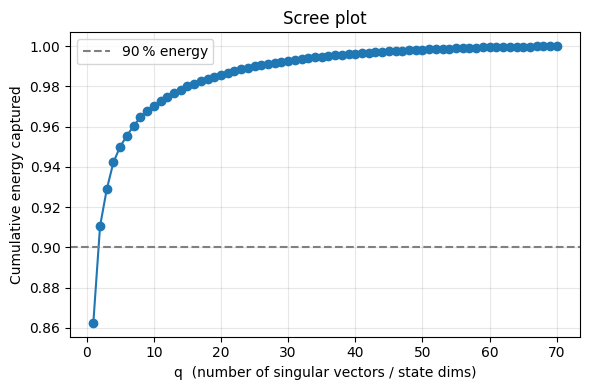

In [29]:
import numpy as np
from scipy.linalg import pinv, svd # Your only additional allowed imports!

input_file  = "./dt1_train.npy"      # or the other array, "./dt2_train.npy"

# ------------------------------------------------------------------
# 1. Load video and build the data matrix Y  (pixel‑trajectories as rows)
# ------------------------------------------------------------------
M = np.load(input_file)                # (f, h, w)
f, h, w = M.shape
Y = M.transpose(1, 2, 0).reshape(h * w, f)   # (hw, f)

# ------------------------------------------------------------------
# 2. Appearance model  Y = U Σ Vᵀ
#    keep first q left‑singular vectors  →  C  (hw × q)
#    project frames into state space    →  X  (q  × f)
# ------------------------------------------------------------------
U, S, Vt = svd(Y, full_matrices=False)       # U: (hw, f)

# 2a. determine a good value for q ---------------------------------
energy = np.cumsum(S ** 2) / np.sum(S ** 2)
# plot
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(S) + 1), energy, marker="o")
plt.axhline(0.90, color="gray", linestyle="--", label="90 % energy")
plt.xlabel("q  (number of singular vectors / state dims)")
plt.ylabel("Cumulative energy captured")
plt.title("Scree plot")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
# ------------------------------------------------------------------

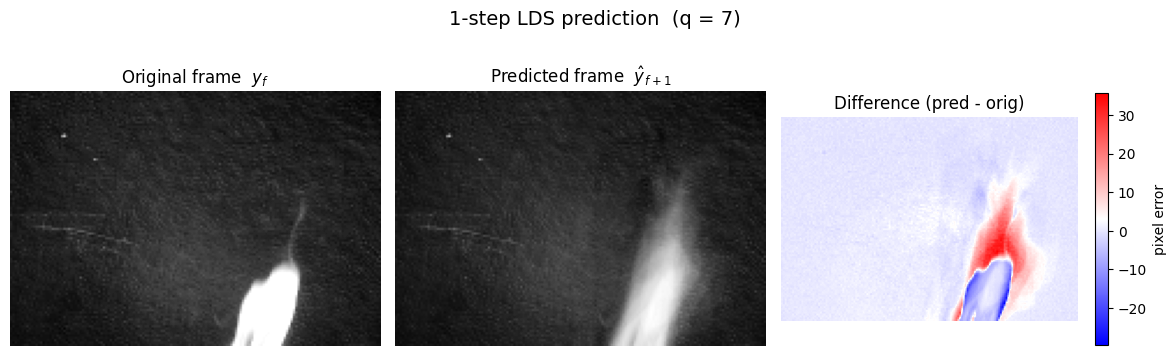

In [30]:
q = 7                      # number of state-space dimensions ; ~96% cumulative energy captured
C = U[:, :q]                                 # (hw, q)
X = np.diag(S[:q]) @ Vt[:q, :]               # (q,  f)

# ------------------------------------------------------------------
# 3. State transition  x_t = A x_{t-1}
#    Solve least‑squares  A = X₂ X₁⁺
# ------------------------------------------------------------------
X1 = X[:, :-1]          # x₁ … x_{f-1}   (q × (f−1))
X2 = X[:,  1:]          # x₂ … x_f       (q × (f−1))
A  = X2 @ pinv(X1)      # (q × q)

# ------------------------------------------------------------------
# 4. 1‑step prediction in state space  →  back to pixel space
# ------------------------------------------------------------------
x_next = A @ X[:, -1]                     # (q,)
y_next = C @ x_next                       # (hw,)
frame  = y_next.reshape(h, w)             # (h, w)

# ------------------------------------------------------------------
# 5. Save and done
# ------------------------------------------------------------------
output_file = "./dt1_pred_q7.npy"    # wherever you want to save
np.save(output_file, frame)

# ------------------------------------------------------------------
# 6. Visualize original‑vs‑predicted frame
# ------------------------------------------------------------------
orig_frame = M[-1]                # ground‑truth frame at time f   (h, w)
pred_frame = frame                # your 1‑step prediction        (h, w)
diff       = pred_frame - orig_frame

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(orig_frame, cmap="gray")
axes[0].set_title("Original frame  $y_f$")
axes[0].axis("off")

axes[1].imshow(pred_frame, cmap="gray")
axes[1].set_title("Predicted frame  $\hat y_{f+1}$")
axes[1].axis("off")

im = axes[2].imshow(diff, cmap="bwr")          # red = over‑prediction, blue = under
axes[2].set_title("Difference (pred ‑ orig)")
axes[2].axis("off")
fig.colorbar(im, ax=axes[2], shrink=0.75, label="pixel error")

plt.suptitle(f"1‑step LDS prediction  (q = {q})", fontsize=14)
plt.tight_layout()
plt.show()

##### Bonus 1
Re-formulate your LDS implementation so that it also learns $W\vec{v}_t$, the driving noise parameter in the state space model. Recall that this first relies on the one-step prediction error: $$ \vec{p}_t = \vec{x}_{t+1} - A\vec{x}_t $$ which is used to compute the covariance matrix of the driving noise: $$ Q \;=\; \frac{1}{f - 1}\sum_{t=1}^{f-1}\vec{p}_{t}\,\vec{p}_{t}^{T} $$

Perform a singular value decomposition of $ Q = U\Sigma V^{T} $, set $ W = U\sigma^{\frac{1}{2}} $, and $ \vec{v}_t \sim \mathcal{N}\bigl(0,I) $.

Implement the same 1-step prediction as before, this time with the noise term, so the state-space prediction is done as $  $. Does your accuracy improve? Why do you think this is the case?

MSE deterministic: 23.559021
MSE with noise   : 119.091140


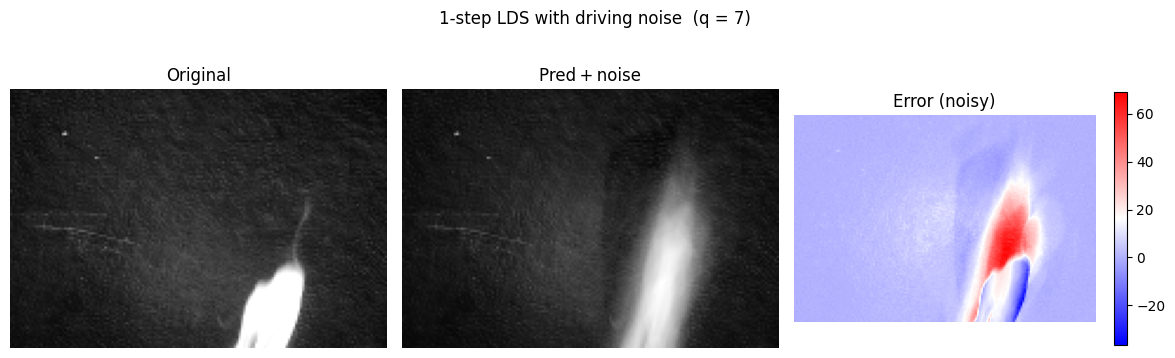

In [31]:
# ------------------------------------------------------------------
# 1 – learn driving‑noise matrix W  and do a *stochastic*
#              one‑step prediction  x_{t+1} = A x_t + W v_t
# ------------------------------------------------------------------
# 1 a. one‑step residuals  p_t = x_{t+1} – A x_t
P = X[:, 1:] - (A @ X[:, :-1])                        # shape (q, f‑1)

# 1 b. empirical covariance of driving noise   Q = (1/(f‑1)) Σ p_t p_tᵀ
Q = (P @ P.T) / (f - 1)                              # (q, q)

# 1 c. factor Q  →  W = U Σ^{½}   (so that W Wᵀ ≈ Q)
Uq, Sq, _ = svd(Q)                                   # Sq: singular values (eigvals)
W = Uq @ np.diag(np.sqrt(Sq))                        # (q, q)

# 1 d. draw a standard‑normal noise vector  v_t  ~ 𝒩(0, I_q)
v = np.random.randn(q)                               # reproducible? set np.random.seed

# 1 e. stochastic 1‑step prediction in state space
x_next_stoch = A @ X[:, -1] + W @ v                  # (q,)
y_next_stoch = C @ x_next_stoch                      # (hw,)
frame_stoch  = y_next_stoch.reshape(h, w)            # (h, w)

# ------------------------------------------------------------------
# 2. save the noisy prediction & simple accuracy check
# ------------------------------------------------------------------
output_file_stoch = "./dt1_pred_q7_noise.npy"
np.save(output_file_stoch, frame_stoch)

# compare MSE against the deterministic LDS prediction you made earlier
mse_det  = np.mean((pred_frame - orig_frame)  ** 2)
mse_sto  = np.mean((frame_stoch - orig_frame) ** 2)
print(f"MSE deterministic: {mse_det:.6f}")
print(f"MSE with noise   : {mse_sto:.6f}")

# optional quick side‑by‑side visualization
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(orig_frame, cmap="gray");  axes[0].set_title("Original");         axes[0].axis("off")
axes[1].imshow(frame_stoch, cmap="gray"); axes[1].set_title("Pred + noise");     axes[1].axis("off")
im = axes[2].imshow(frame_stoch - orig_frame, cmap="bwr")
axes[2].set_title("Error (noisy)");       axes[2].axis("off")
fig.colorbar(im, ax=axes[2], shrink=0.75)
plt.suptitle(f"1‑step LDS with driving noise  (q = {q})")
plt.tight_layout();  plt.show()

##### Bonus 2
Re-formulate your LDS so that your state space model is a second-order autoregressive process. That is, your model should now be: $$ \vec{x}_{t+1} = A_{1}\vec{x}_{t} + A_{2}\vec{x}_{t-1} $$

Learning the transition matrices $A_1$ and $A_2$ is conceptually the same as before, but implementation-wise requires considerably more ingenuity to implement.

Implement the same 1-step prediction as before, this time with the second-order model. Does your accuracy improve? Why do you think this is the case?

(it doesn’t matter if you include the driving noise from the first bonus question here or not; as in, you don’t have to implement the first bonus question to also get this one)

MSE deterministic (AR‑1) : 23.559021
MSE with noise     (AR‑1) : 119.091140
MSE deterministic (AR‑2) : 23.638767


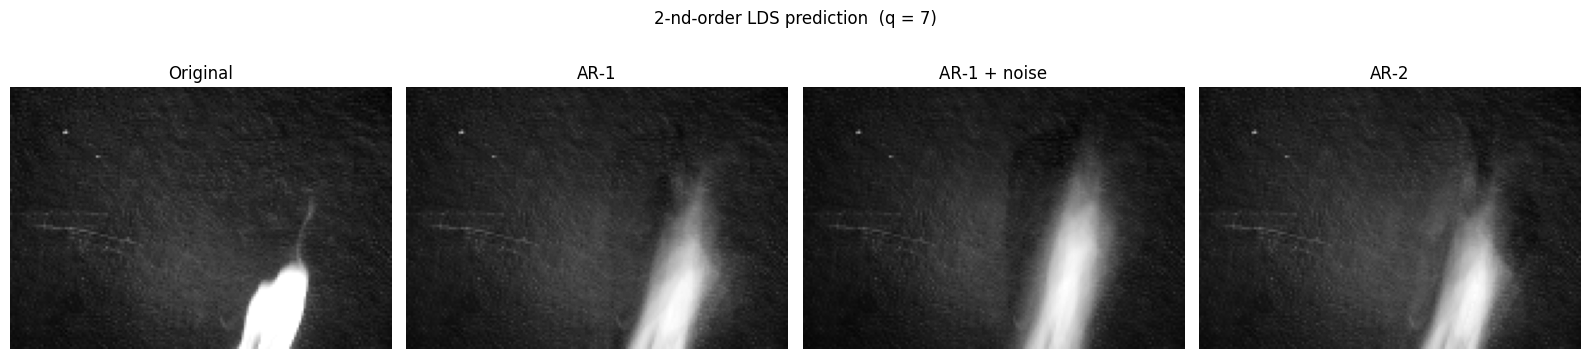

In [32]:
# ------------------------------------------------------------------
# BONUS 2 – second‑order LDS:  x_{t+1} = A1 x_t + A2 x_{t-1}
# ------------------------------------------------------------------
assert f >= 3, "Need ≥3 frames for a 2‑nd‑order model"

# 1.  Build the stacked “design” matrix  Z = [ X₂ ; X₁ ]
X_tm2 = X[:, :-2]          # x₁ … x_{f-2}      (q × (f‑2))
X_tm1 = X[:, 1:-1]         # x₂ … x_{f-1}      (q × (f‑2))
X_t    = X[:, 2:]          # x₃ … x_f          (q × (f‑2))

Z = np.vstack((X_tm1, X_tm2))   # (2q × (f‑2))

# 2.  Least‑squares solve:  [A1 A2] = X_t  ·  Z⁺
A12 = X_t @ pinv(Z)             # (q × 2q)
A1, A2 = A12[:, :q], A12[:, q:] # split into the two q×q blocks

# 3.  1‑step prediction with the 2‑nd‑order model
x_next_2nd = A1 @ X[:, -1] + A2 @ X[:, -2]   # (q,)
y_next_2nd = C @ x_next_2nd                  # (hw,)
frame_2nd  = y_next_2nd.reshape(h, w)        # (h, w)

# ------------------------------------------------------------------
# 4.  Save & quick accuracy check
# ------------------------------------------------------------------
output_file_2nd = "./dt1_pred_q7_AR2.npy"
np.save(output_file_2nd, frame_2nd)

mse_2nd = np.mean((frame_2nd - orig_frame) ** 2)
print(f"MSE deterministic (AR‑1) : {mse_det :.6f}")
print(f"MSE with noise     (AR‑1) : {mse_sto :.6f}")
print(f"MSE deterministic (AR‑2) : {mse_2nd:.6f}")

# optional visual comparison
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(orig_frame, cmap="gray");      axes[0].set_title("Original");      axes[0].axis("off")
axes[1].imshow(pred_frame, cmap="gray");      axes[1].set_title("AR‑1");          axes[1].axis("off")
axes[2].imshow(frame_stoch, cmap="gray");     axes[2].set_title("AR‑1 + noise");  axes[2].axis("off")
axes[3].imshow(frame_2nd, cmap="gray");       axes[3].set_title("AR‑2");          axes[3].axis("off")
plt.suptitle(f"2‑nd‑order LDS prediction  (q = {q})")
plt.tight_layout();  plt.show()

---
##### dt2

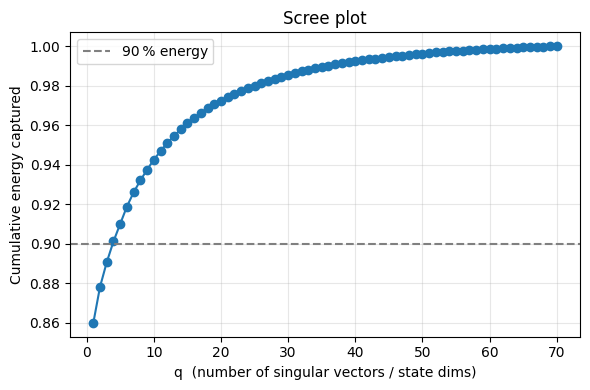

In [33]:
input_file  = "./dt2_train.npy"

# ------------------------------------------------------------------
# 1. Load video and build the data matrix Y  (pixel‑trajectories as rows)
# ------------------------------------------------------------------
M = np.load(input_file)                # (f, h, w)
f, h, w = M.shape
Y = M.transpose(1, 2, 0).reshape(h * w, f)   # (hw, f)

# ------------------------------------------------------------------
# 2. Appearance model  Y = U Σ Vᵀ
#    keep first q left‑singular vectors  →  C  (hw × q)
#    project frames into state space    →  X  (q  × f)
# ------------------------------------------------------------------
U, S, Vt = svd(Y, full_matrices=False)       # U: (hw, f)

# 2a. determine a good value for q ---------------------------------
energy = np.cumsum(S ** 2) / np.sum(S ** 2)
# plot
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(S) + 1), energy, marker="o")
plt.axhline(0.90, color="gray", linestyle="--", label="90 % energy")
plt.xlabel("q  (number of singular vectors / state dims)")
plt.ylabel("Cumulative energy captured")
plt.title("Scree plot")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
# ------------------------------------------------------------------

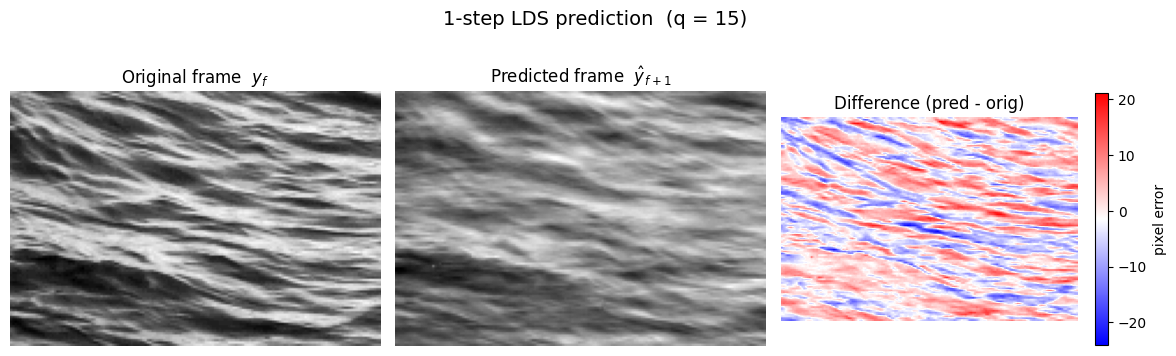

In [34]:
q = 15                      # number of state-space dimensions; ~96% cumulative energy captured
C = U[:, :q]                                 # (hw, q)
X = np.diag(S[:q]) @ Vt[:q, :]               # (q,  f)

# ------------------------------------------------------------------
# 3. State transition  x_t = A x_{t-1}
#    Solve least‑squares  A = X₂ X₁⁺
# ------------------------------------------------------------------
X1 = X[:, :-1]          # x₁ … x_{f-1}   (q × (f−1))
X2 = X[:,  1:]          # x₂ … x_f       (q × (f−1))
A  = X2 @ pinv(X1)      # (q × q)

# ------------------------------------------------------------------
# 4. 1‑step prediction in state space  →  back to pixel space
# ------------------------------------------------------------------
x_next = A @ X[:, -1]                     # (q,)
y_next = C @ x_next                       # (hw,)
frame  = y_next.reshape(h, w)             # (h, w)

# ------------------------------------------------------------------
# 5. Save and done
# ------------------------------------------------------------------
output_file = "./dt2_pred_q15.npy"    # wherever you want to save
np.save(output_file, frame)

# ------------------------------------------------------------------
# 6. Visualize original‑vs‑predicted frame
# ------------------------------------------------------------------
orig_frame = M[-1]                # ground‑truth frame at time f   (h, w)
pred_frame = frame                # your 1‑step prediction        (h, w)
diff       = pred_frame - orig_frame

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(orig_frame, cmap="gray")
axes[0].set_title("Original frame  $y_f$")
axes[0].axis("off")

axes[1].imshow(pred_frame, cmap="gray")
axes[1].set_title("Predicted frame  $\hat y_{f+1}$")
axes[1].axis("off")

im = axes[2].imshow(diff, cmap="bwr")          # red = over‑prediction, blue = under
axes[2].set_title("Difference (pred ‑ orig)")
axes[2].axis("off")
fig.colorbar(im, ax=axes[2], shrink=0.75, label="pixel error")

plt.suptitle(f"1‑step LDS prediction  (q = {q})", fontsize=14)
plt.tight_layout()
plt.show()

MSE deterministic: 44.016705
MSE with noise   : 43.353038


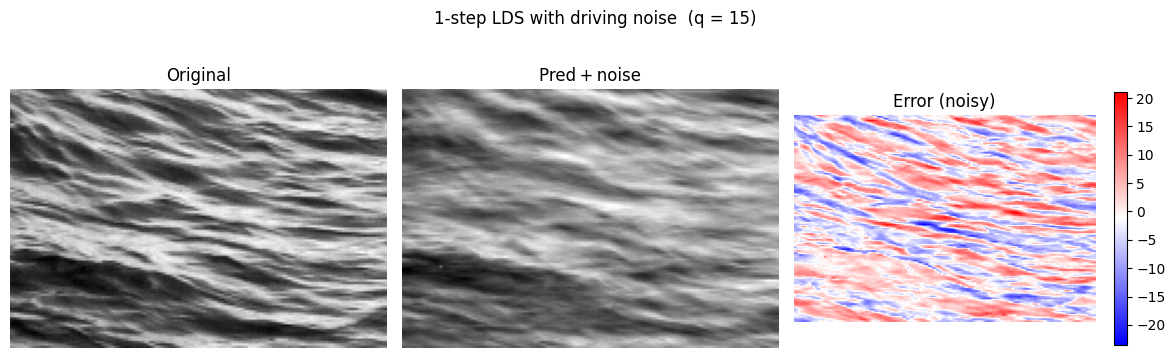

In [35]:
# ------------------------------------------------------------------
# 1 – learn driving‑noise matrix W  and do a *stochastic*
#              one‑step prediction  x_{t+1} = A x_t + W v_t
# ------------------------------------------------------------------
# 1 a. one‑step residuals  p_t = x_{t+1} – A x_t
P = X[:, 1:] - (A @ X[:, :-1])                        # shape (q, f‑1)

# 1 b. empirical covariance of driving noise   Q = (1/(f‑1)) Σ p_t p_tᵀ
Q = (P @ P.T) / (f - 1)                              # (q, q)

# 1 c. factor Q  →  W = U Σ^{½}   (so that W Wᵀ ≈ Q)
Uq, Sq, _ = svd(Q)                                   # Sq: singular values (eigvals)
W = Uq @ np.diag(np.sqrt(Sq))                        # (q, q)

# 1 d. draw a standard‑normal noise vector  v_t  ~ 𝒩(0, I_q)
v = np.random.randn(q)                               # reproducible? set np.random.seed

# 1 e. stochastic 1‑step prediction in state space
x_next_stoch = A @ X[:, -1] + W @ v                  # (q,)
y_next_stoch = C @ x_next_stoch                      # (hw,)
frame_stoch  = y_next_stoch.reshape(h, w)            # (h, w)

# ------------------------------------------------------------------
# 2. save the noisy prediction & simple accuracy check
# ------------------------------------------------------------------
output_file_stoch = "./dt2_pred_q15_noise.npy"
np.save(output_file_stoch, frame_stoch)

# compare MSE against the deterministic LDS prediction you made earlier
mse_det  = np.mean((pred_frame - orig_frame)  ** 2)
mse_sto  = np.mean((frame_stoch - orig_frame) ** 2)
print(f"MSE deterministic: {mse_det:.6f}")
print(f"MSE with noise   : {mse_sto:.6f}")

# optional quick side‑by‑side visualization
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(orig_frame, cmap="gray");  axes[0].set_title("Original");         axes[0].axis("off")
axes[1].imshow(frame_stoch, cmap="gray"); axes[1].set_title("Pred + noise");     axes[1].axis("off")
im = axes[2].imshow(frame_stoch - orig_frame, cmap="bwr")
axes[2].set_title("Error (noisy)");       axes[2].axis("off")
fig.colorbar(im, ax=axes[2], shrink=0.75)
plt.suptitle(f"1‑step LDS with driving noise  (q = {q})")
plt.tight_layout();  plt.show()

MSE deterministic (AR‑1) : 44.016705
MSE with noise     (AR‑1) : 43.353038
MSE deterministic (AR‑2) : 46.335063


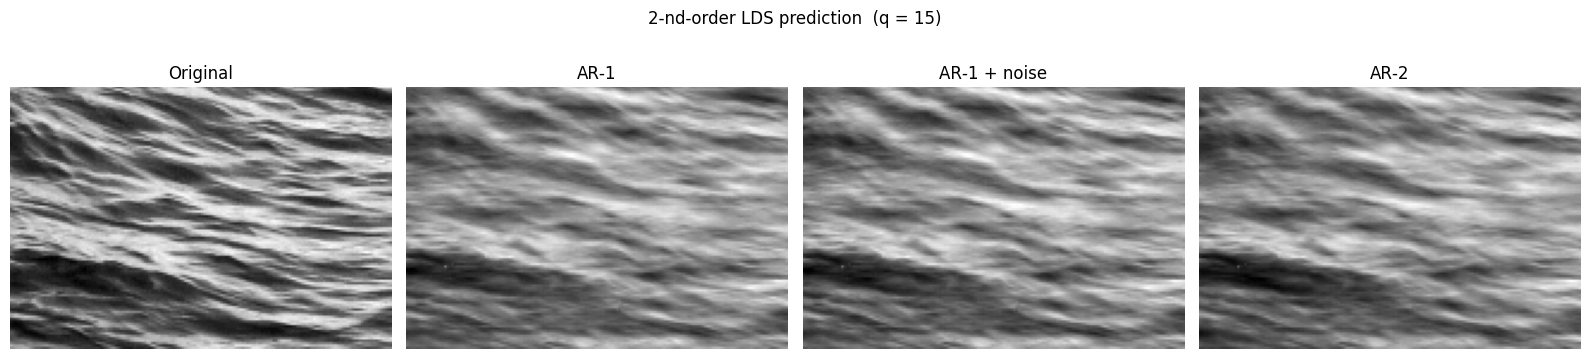

In [36]:
# ------------------------------------------------------------------
# BONUS 2 – second‑order LDS:  x_{t+1} = A1 x_t + A2 x_{t-1}
# ------------------------------------------------------------------
assert f >= 3, "Need ≥3 frames for a 2‑nd‑order model"

# 1.  Build the stacked “design” matrix  Z = [ X₂ ; X₁ ]
X_tm2 = X[:, :-2]          # x₁ … x_{f-2}      (q × (f‑2))
X_tm1 = X[:, 1:-1]         # x₂ … x_{f-1}      (q × (f‑2))
X_t    = X[:, 2:]          # x₃ … x_f          (q × (f‑2))

Z = np.vstack((X_tm1, X_tm2))   # (2q × (f‑2))

# 2.  Least‑squares solve:  [A1 A2] = X_t  ·  Z⁺
A12 = X_t @ pinv(Z)             # (q × 2q)
A1, A2 = A12[:, :q], A12[:, q:] # split into the two q×q blocks

# 3.  1‑step prediction with the 2‑nd‑order model
x_next_2nd = A1 @ X[:, -1] + A2 @ X[:, -2]   # (q,)
y_next_2nd = C @ x_next_2nd                  # (hw,)
frame_2nd  = y_next_2nd.reshape(h, w)        # (h, w)

# ------------------------------------------------------------------
# 4.  Save & quick accuracy check
# ------------------------------------------------------------------
output_file_2nd = "./dt2_pred_q15_AR2.npy"
np.save(output_file_2nd, frame_2nd)

mse_2nd = np.mean((frame_2nd - orig_frame) ** 2)
print(f"MSE deterministic (AR‑1) : {mse_det :.6f}")
print(f"MSE with noise     (AR‑1) : {mse_sto :.6f}")
print(f"MSE deterministic (AR‑2) : {mse_2nd:.6f}")

# optional visual comparison
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(orig_frame, cmap="gray");      axes[0].set_title("Original");      axes[0].axis("off")
axes[1].imshow(pred_frame, cmap="gray");      axes[1].set_title("AR‑1");          axes[1].axis("off")
axes[2].imshow(frame_stoch, cmap="gray");     axes[2].set_title("AR‑1 + noise");  axes[2].axis("off")
axes[3].imshow(frame_2nd, cmap="gray");       axes[3].set_title("AR‑2");          axes[3].axis("off")
plt.suptitle(f"2‑nd‑order LDS prediction  (q = {q})")
plt.tight_layout();  plt.show()